# DBSCAN

## Imports

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Defaults

In [2]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Load dataset

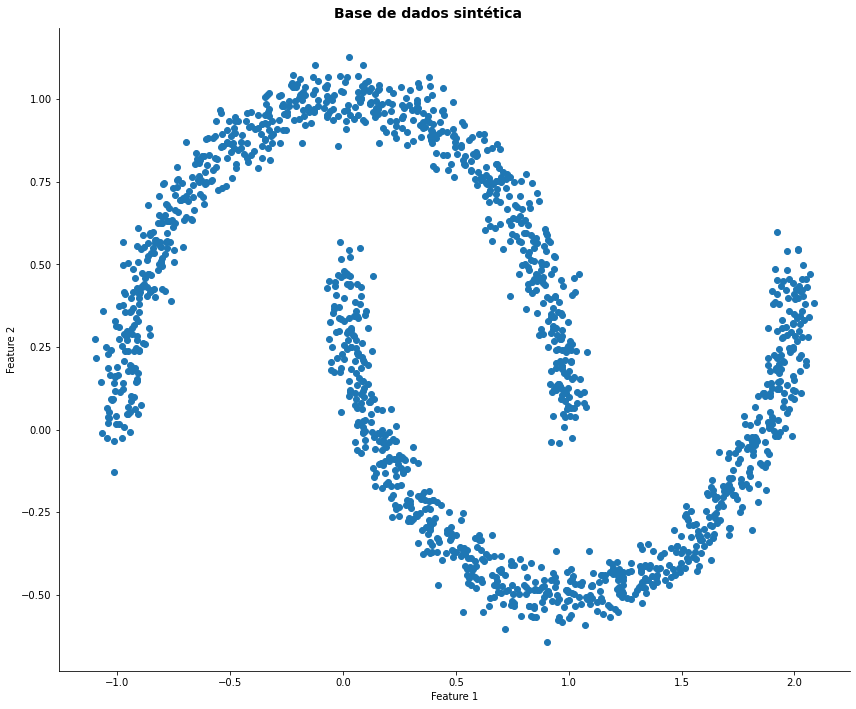

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1500, noise=.05)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.suptitle(f"Base de dados sintética", fontsize=14, fontweight='bold')
plt.tight_layout();

## Default usage

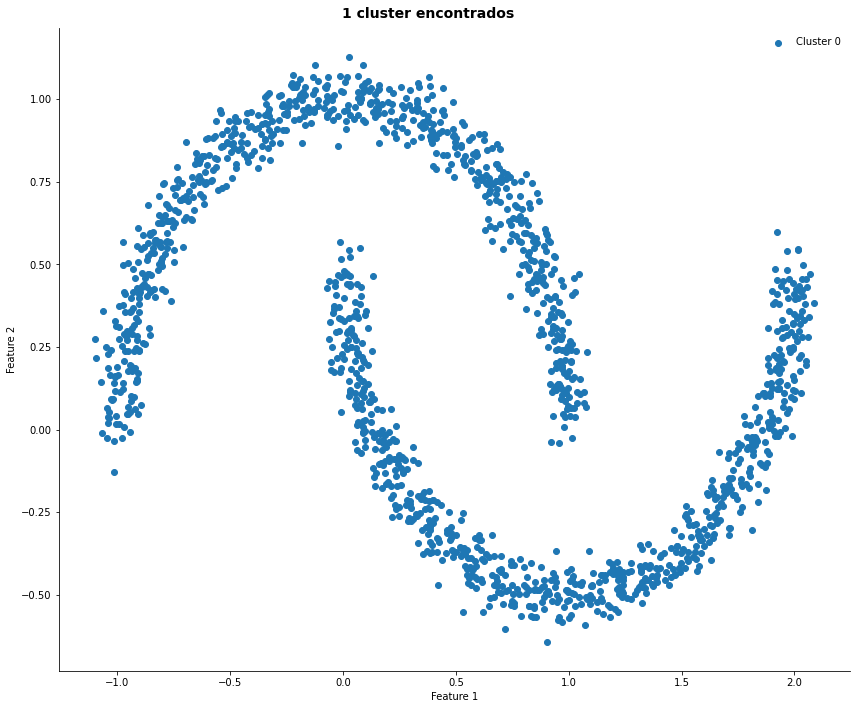

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

labels = dbscan.fit_predict(X)

def plot_cluster(X, labels):
    fig, ax = plt.subplots()
    clusters = np.unique(labels)
    for c in clusters:
        ax.scatter(X[labels==c, 0], X[labels==c, 1], label=f"Cluster {c}")
    ax.legend(frameon=False)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.suptitle(f"{len(clusters)} cluster encontrados", fontsize=14, fontweight='bold')
    plt.tight_layout()

plot_cluster(X, labels)

## KMeans comparison

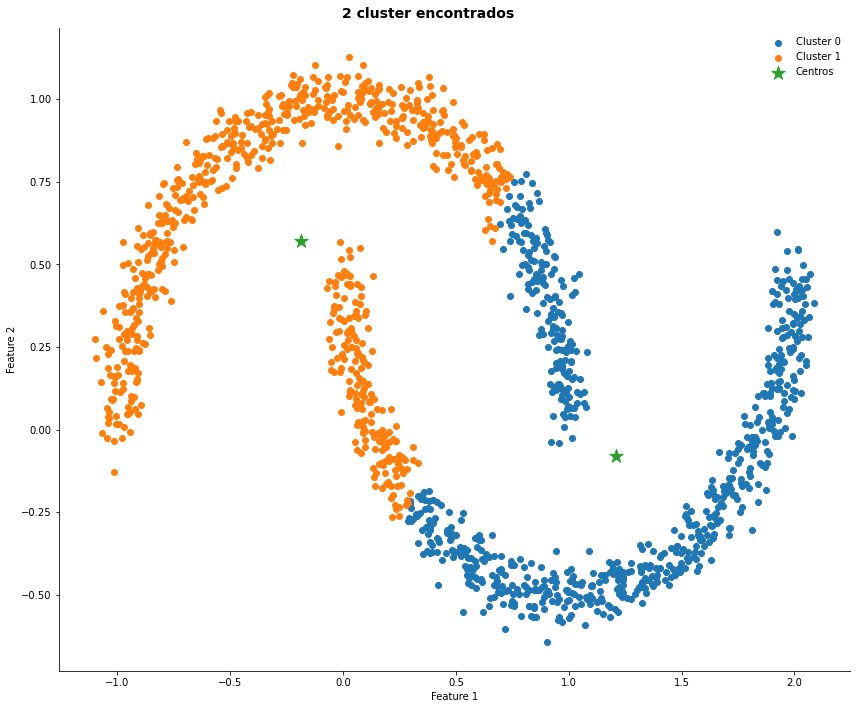

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=42)

labels = kmeans.fit_predict(X)
plot_cluster(X, labels)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s=200, marker='*', label=f'Centros')
plt.legend(frameon=False);

## Advanced usage

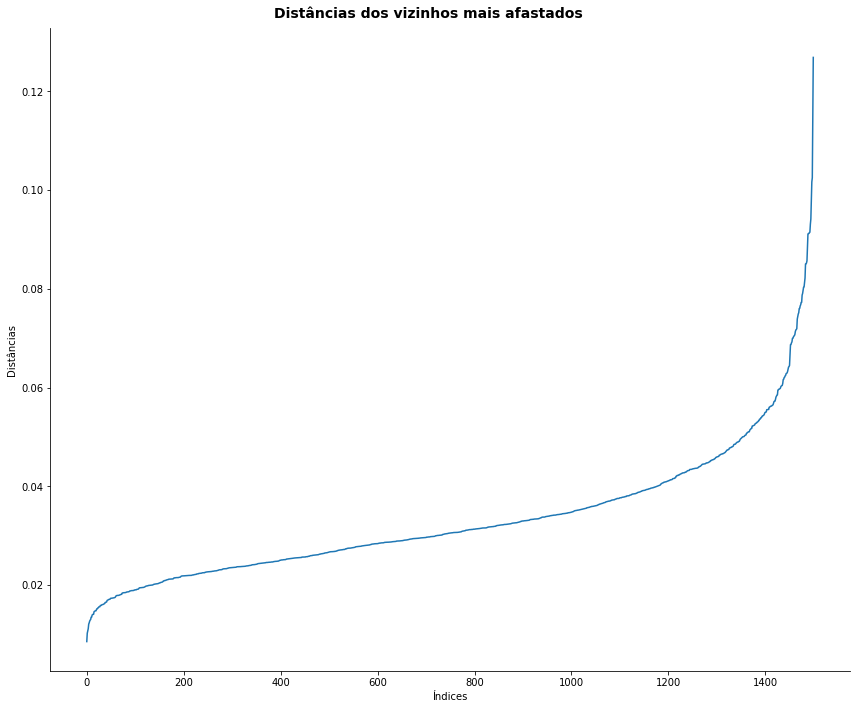

In [6]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nn = NearestNeighbors(radius=dbscan.eps, n_neighbors=dbscan.min_samples)
nn.fit(X)
distances, index = nn.kneighbors(X)
distances = sorted(distances[:, -1])
fig, ax = plt.subplots()
ax.plot(distances)
ax.set_ylabel("Distâncias")
ax.set_xlabel("Índices")
plt.suptitle("Distâncias dos vizinhos mais afastados", fontsize=14, fontweight='bold')
plt.tight_layout();

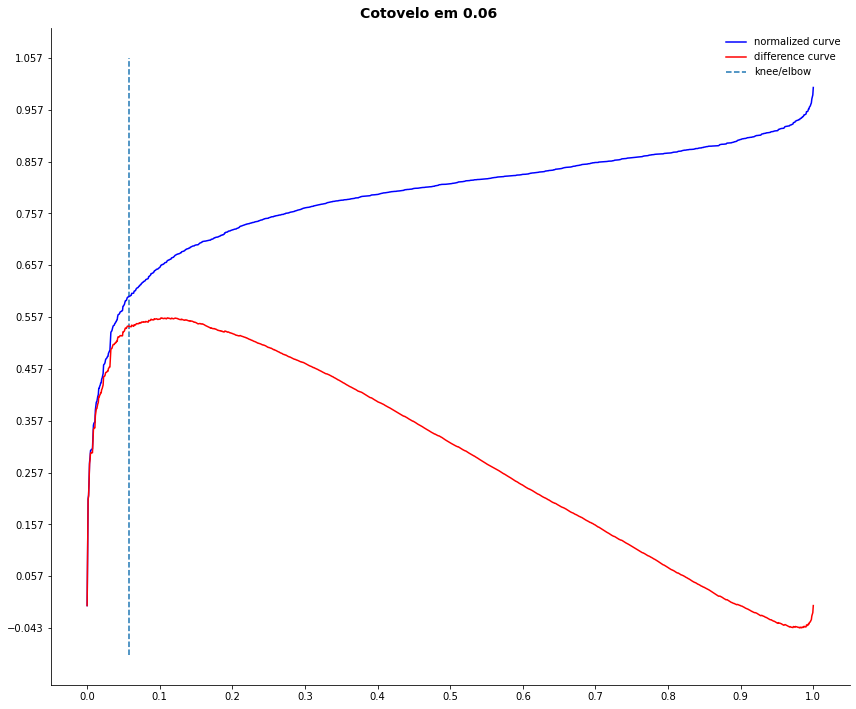

In [7]:
kneedle = KneeLocator(index[:, 0], distances, curve='convex')
kneedle.plot_knee_normalized(figsize=(12, 10))
canvas = plt.gca()
canvas.set_title('')
canvas.legend(frameon=False)
plt.suptitle(f"Cotovelo em {np.round(kneedle.knee_y, 2)}", fontsize=14, fontweight='bold')
plt.tight_layout()

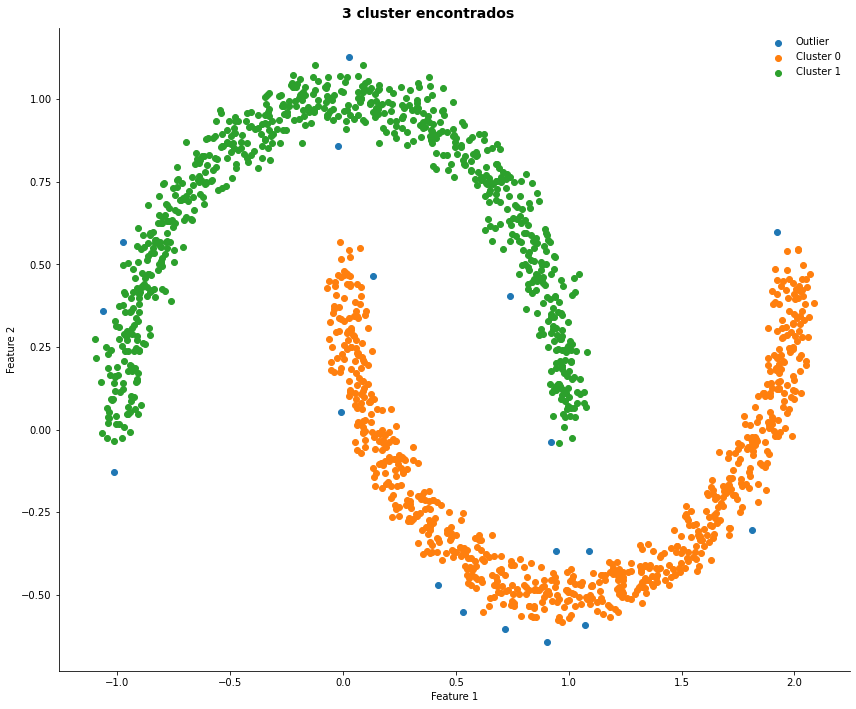

In [8]:
dbscan = DBSCAN(eps=kneedle.knee_y, min_samples=4)
labels = dbscan.fit_predict(X)
plot_cluster(X, labels)
canvas = plt.gca()
legend = plt.legend(frameon=False)
for text in legend.get_texts():
    if '-1' in text.get_text():
        text.set_text('Outlier')